<a href="https://colab.research.google.com/github/atmark-techno/armadillo-iot-g4_model_zoo/blob/main/GoogleColabNotebooks/ImageSegmentation_OperationCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## モデルのダウンロード

[PINTO0309](https://github.com/PINTO0309)様が量子化したモデルがArmadillo-IoT ゲートウェイ G4上でも使用できますので、そちらを使用します。

In [1]:
%%bash
mkdir tmp
cd tmp
wget https://raw.githubusercontent.com/PINTO0309/PINTO_model_zoo/main/082_MediaPipe_Meet_Segmentation/download_full_144x256.sh
bash download_full_144x256.sh
cp model_integer_quant.tflite ../human_segmentation.tflite
cd ..
rm -rf tmp

tfjs_model_float32/model.json
tensorrt_saved_model_float32/variables/
openvino/FP32/
openvino/FP16/
tfjs_model_float16/group1-shard1of1.bin
tensorrt_saved_model_float16/variables/variables.data-00000-of-00001
saved_model.pb
tfjs_model_float16/model.json
model_float32_opt.onnx
openvino/
tensorrt_saved_model_float32/variables/variables.index
model_weight_quant.tflite
model_integer_quant.tflite
model_float32.tflite
model_v2.pb
variables/variables.index
model_float32.onnx
tensorrt_saved_model_float16/
variables/
tfjs_model_float32/
tfjs_model_float16/
openvino/FP16/144x256/
model_float16_quant.tflite
tensorrt_saved_model_float16/assets/trt-serialized-engine.TRTEngineOp_1_1
tensorrt_saved_model_float16/assets/trt-serialized-engine.TRTEngineOp_1_3
openvino/FP32/144x256/
tensorrt_saved_model_float32/
tensorrt_saved_model_float16/assets/trt-serialized-engine.TRTEngineOp_1_2
openvino/FP32/144x256/saved_model.bin
tensorrt_saved_model_float16/assets/trt-serialized-engine.TRTEngineOp_1_0
openvino/

--2022-08-17 08:21:55--  https://raw.githubusercontent.com/PINTO0309/PINTO_model_zoo/main/082_MediaPipe_Meet_Segmentation/download_full_144x256.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366 [text/plain]
Saving to: ‘download_full_144x256.sh’

     0K                                                       100% 13.6M=0s

2022-08-17 08:21:55 (13.6 MB/s) - ‘download_full_144x256.sh’ saved [366/366]

download_full_144x256.sh: line 4: warning: command substitution: ignored null byte in input
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
100 7893k  100 7893k    0     0  

## テスト画像のダウンロード

In [2]:
# テスト画像をtest.jpgという名前で保存します。
%%bash
wget "https://unsplash.com/photos/OFyh9TpMyM8/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjYwNjExMDAz&force=true&w=1920" -O test.jpg

--2022-08-17 08:22:05--  https://unsplash.com/photos/OFyh9TpMyM8/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjYwNjExMDAz&force=true&w=1920
Resolving unsplash.com (unsplash.com)... 151.101.129.181, 151.101.1.181, 151.101.193.181, ...
Connecting to unsplash.com (unsplash.com)|151.101.129.181|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://images.unsplash.com/photo-1541625602330-2277a4c46182?ixlib=rb-1.2.1&dl=coen-van-de-broek-OFyh9TpMyM8-unsplash.jpg&w=1920&q=80&fm=jpg&crop=entropy&cs=tinysrgb [following]
--2022-08-17 08:22:05--  https://images.unsplash.com/photo-1541625602330-2277a4c46182?ixlib=rb-1.2.1&dl=coen-van-de-broek-OFyh9TpMyM8-unsplash.jpg&w=1920&q=80&fm=jpg&crop=entropy&cs=tinysrgb
Resolving images.unsplash.com (images.unsplash.com)... 146.75.30.208, 2a04:4e42:79::720
Connecting to images.unsplash.com (images.unsplash.com)|146.75.30.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 348978 (341K) [image/jpeg]

## テストコード

### ライブラリのインポート

In [3]:
from tensorflow.lite.python.interpreter import Interpreter # Armadillo-IoT ゲートウェイ G4 実機上では、"from tflite_runtime import Interpreter" としてインポートしてください。
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Google colab上でcv2画像を表示するために必要なライブラリ

### interpreterの準備

In [4]:
interpreter = Interpreter('human_segmentation.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

_, i_height, i_width, _ = input_details[0]['shape']

[{'name': 'input_1', 'index': 251, 'shape': array([  1, 144, 256,   3], dtype=int32), 'shape_signature': array([  1, 144, 256,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'segment', 'index': 252, 'shape': array([  1, 144, 256,   2], dtype=int32), 'shape_signature': array([  1, 144, 256,   2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


### テスト画像を読み込み、モデルに入力する形に整形する

In [5]:
img = cv2.imread('test.jpg')
src_height, src_width, _ = img.shape
input_image = cv2.resize(img, (i_width, i_height))
input_image = input_image / 255
input_image = np.expand_dims(input_image, 0).astype(input_details[0]['dtype'])

### 推論実行

In [6]:
interpreter.set_tensor(input_details[0]['index'], input_image)
interpreter.invoke()

### 推論結果を抽出

In [7]:
output = interpreter.get_tensor(output_details[0]['index']).squeeze()

### 画像の後処理

出力画像は2チャンネル画像なので、それぞれのチャンネルに分解して再度結合させます。

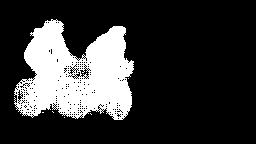

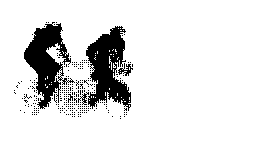

In [8]:
out1 = output[:, :, 0]
out2 = output[:, :, 1]
out1 = np.invert((out1 > 0.5) * 255).astype(np.uint8)
out2 = np.invert((out2 > 0.5) * 255).astype(np.uint8)

cv2_imshow(out1)
cv2_imshow(out2)

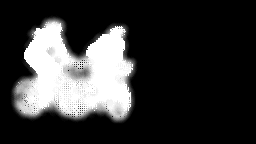

In [9]:
joint = cv2.ximgproc.jointBilateralFilter(out2, out1, 8, 75, 75)
cv2_imshow(joint)

検出した領域部分を赤くするためのフィルタを作成します。

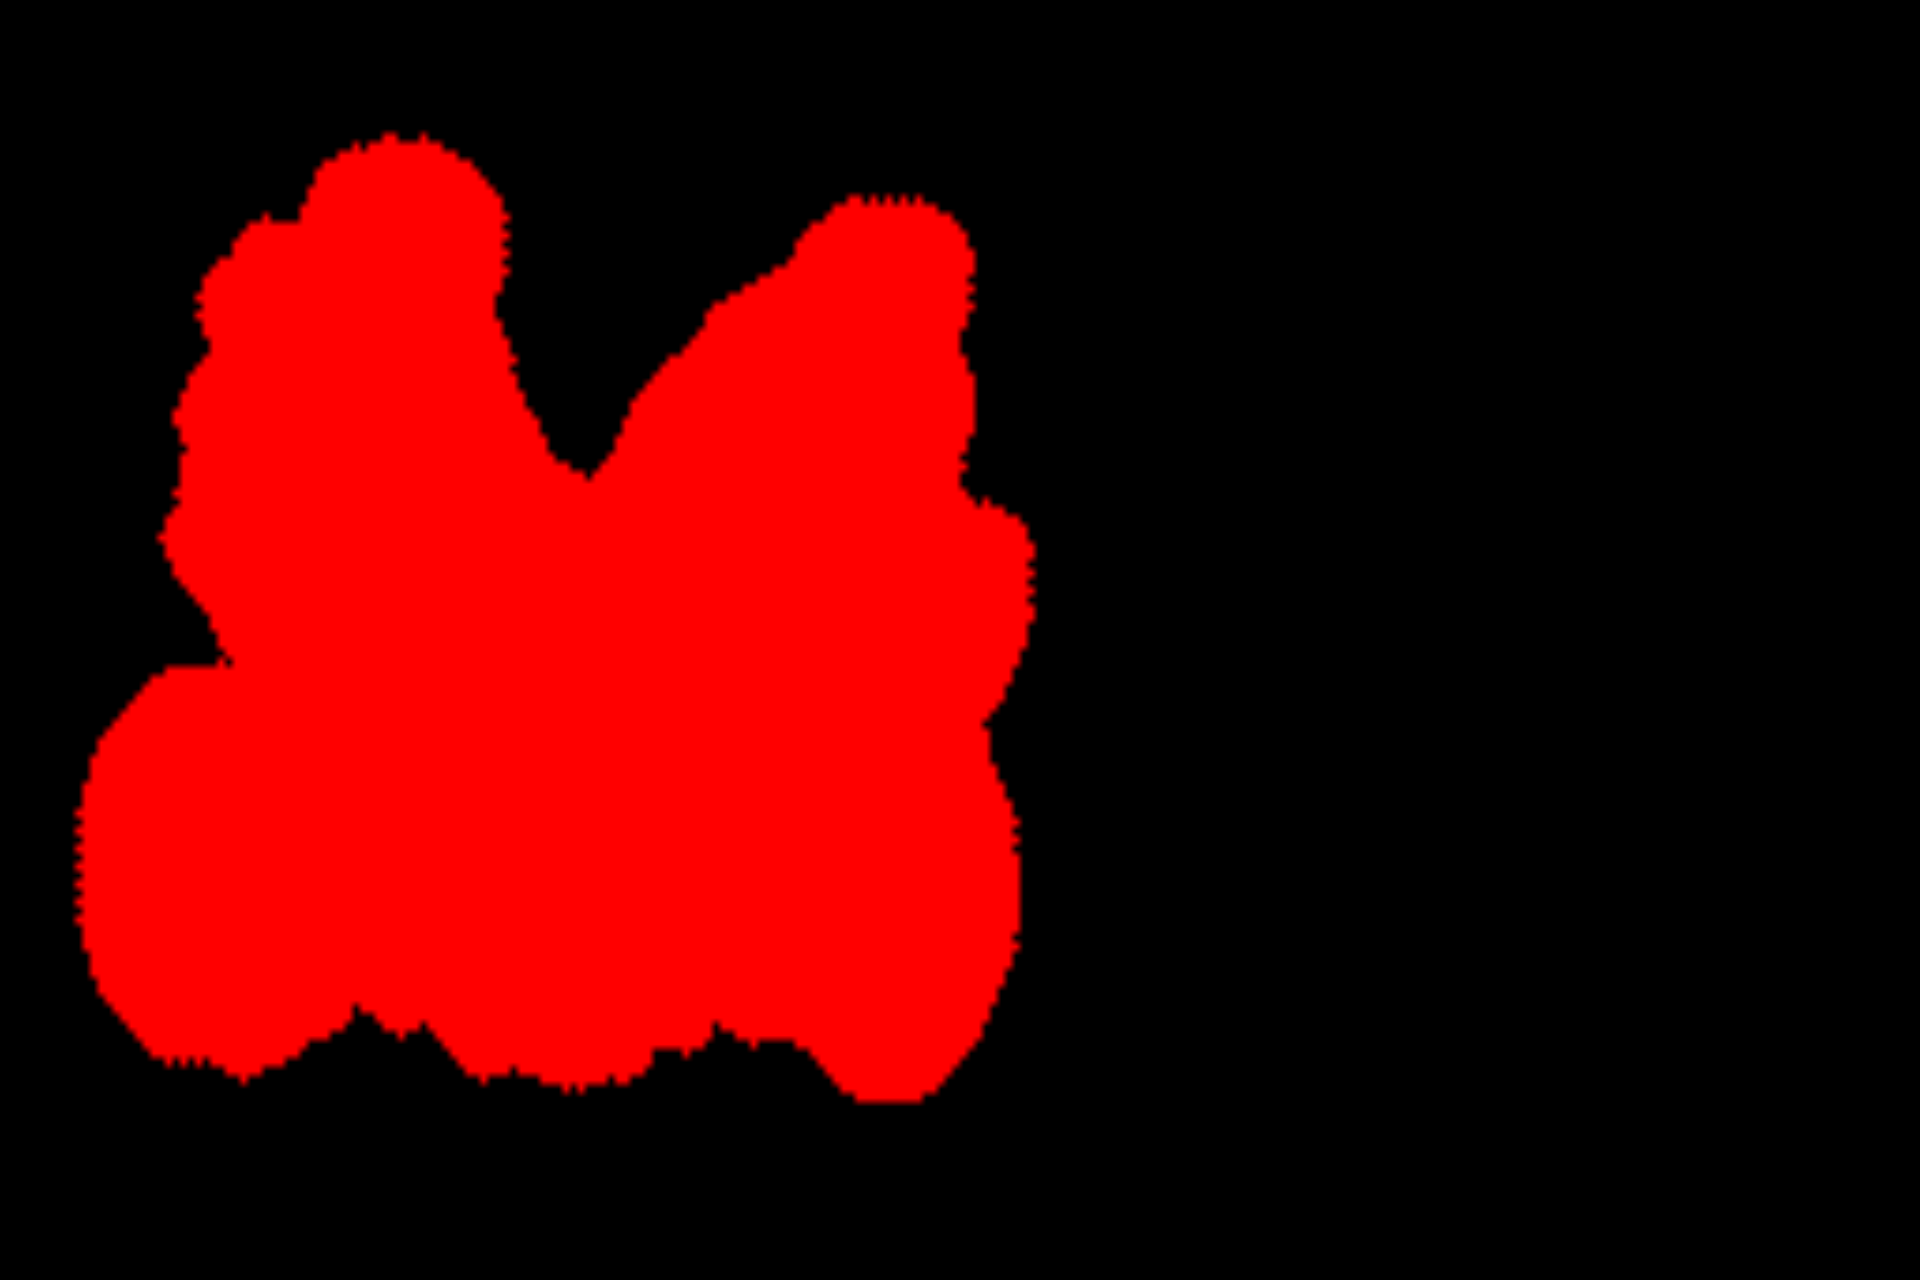

In [10]:
human_area = (joint != 0)
seg = np.zeros(list(joint.shape) + [3])
seg[human_area] = [0, 0, 255]
seg = cv2.resize(seg, (src_width, src_height)).astype(np.uint8)
cv2_imshow(seg)

### 元の画像と重ね合わせて描画

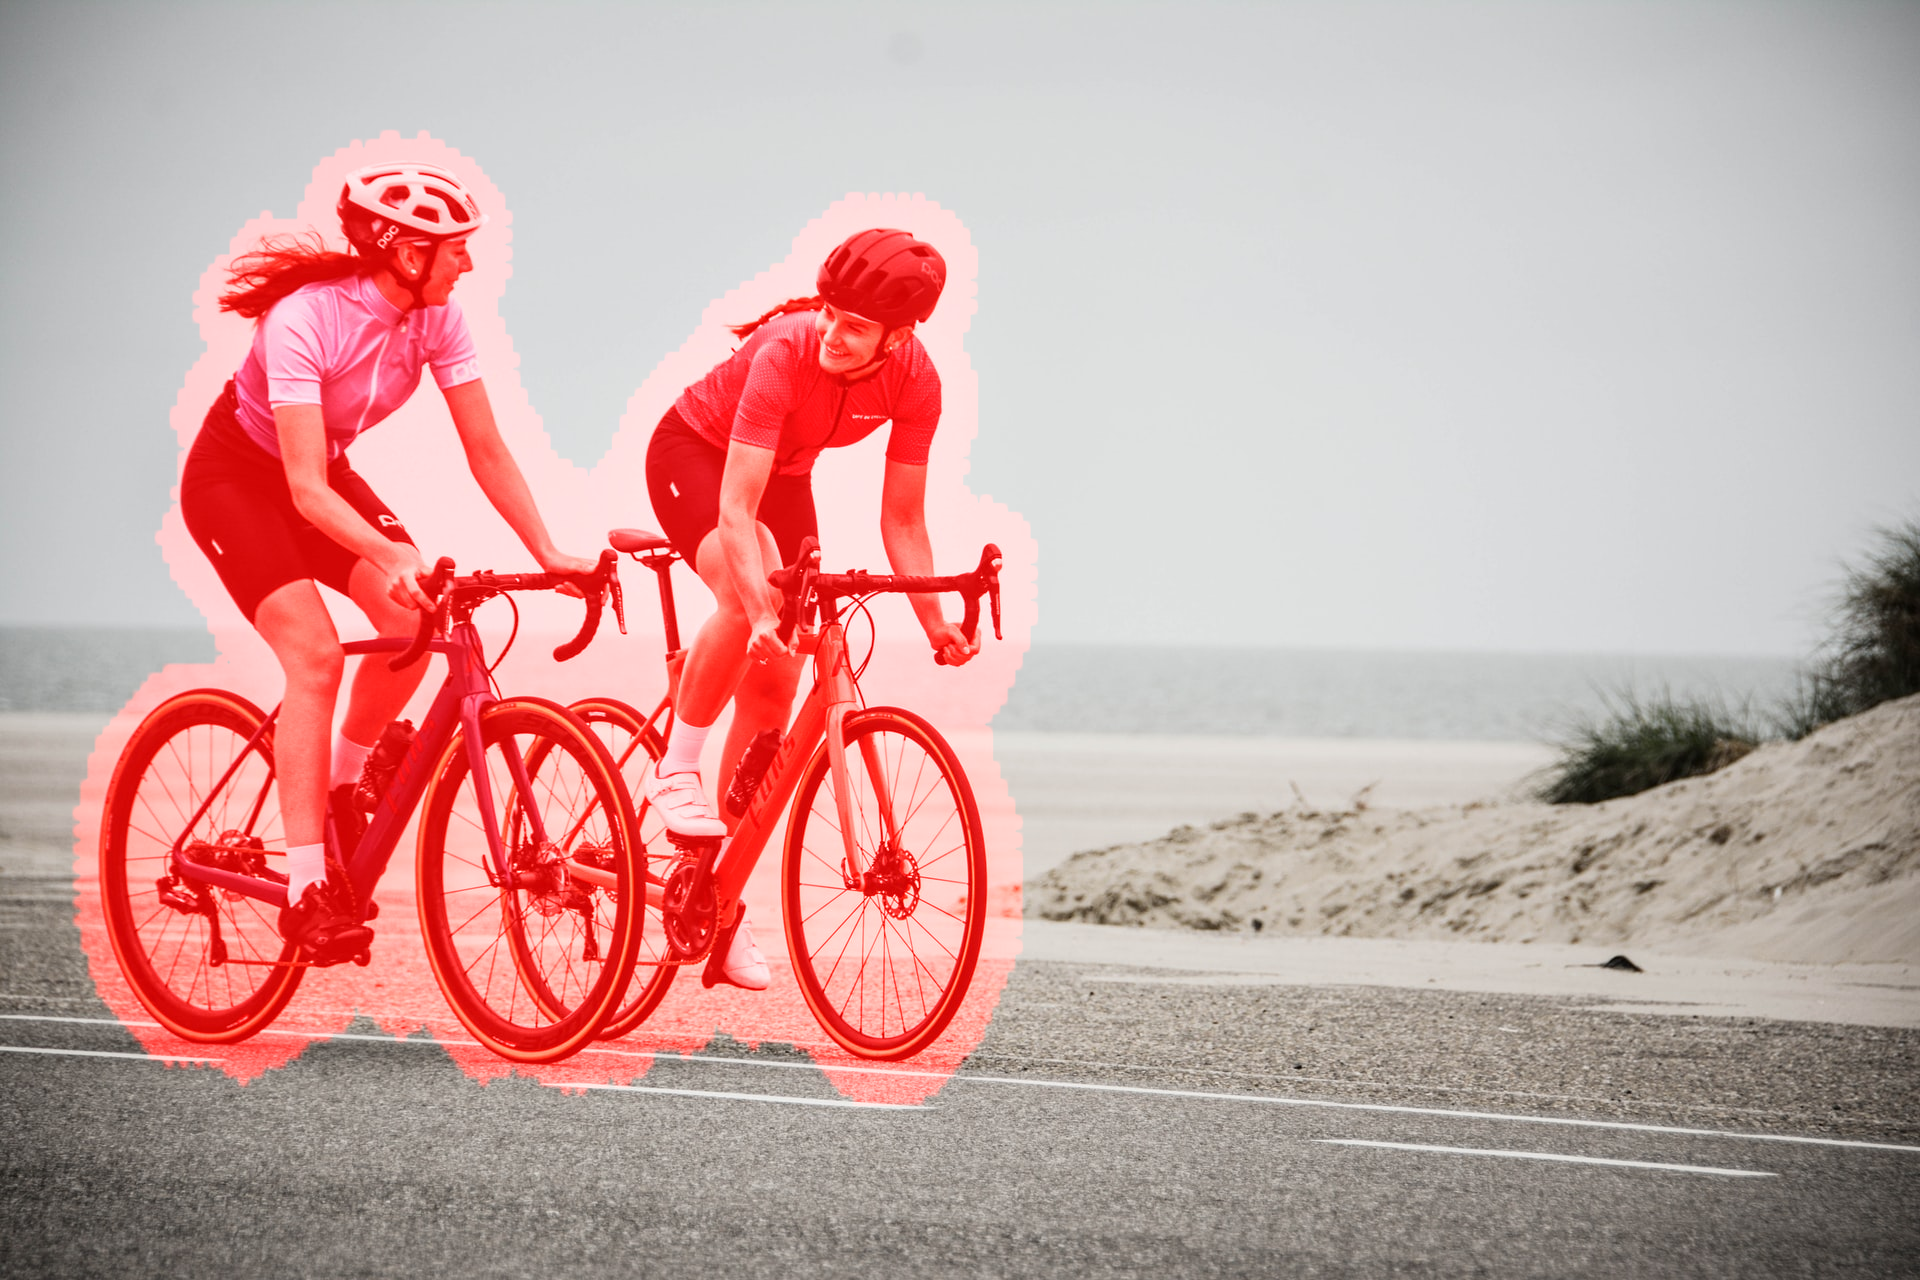

In [11]:
output_img = cv2.addWeighted(img, 1, seg, 0.8, 0)
cv2_imshow(output_img)